# CROSSVALIDATION-REPORTS

In [1]:
import seaborn
seaborn.set(font_scale = 2)
import matplotlib.pyplot as plt
from lib.auxiliary_functions import *

# PARSERS

### UNIT PARSING

Specify unit parsing if any must be applied

In [2]:
def parse_units(df, col, unit):
    if unit == 'cm s-1':
        df[col] = df[col]*0.01
    return df

### FEATURE-TYPE PARSING

Specify the feature type parsings that must be applied

In [3]:
def flatten(array):
    try:
        array = sum(array,[])
    except:
        pass
    return array

In [4]:
def serie_name(s,f,v):
    i_name = os.path.basename(s['instrument'])
    p_name = os.path.basename(s['platform'])
    dm = os.path.basename(f['data_mode'])
    pl = os.path.basename(f['processing_level'])
    return '%s (%s) | %s'%(i_name, ','.join([pl,dm]), v['param_name'])

In [5]:
def parse_series(s,f,v,qc_max,center):
    ftype = f['feature_type']
    name = serie_name(s,f,v)
    try:
        if ftype == 'grid':
            lats = [lat for lat in f['coordinates']['latitude']['data']]
            lons = [f['coordinates']['longitude']['data']]
            diffs = [distance(lat,lon,center) for lat,lon in zip(lats,lons)]
            index = diffs.index(min(diffs))
            y = [flatten(t)[index] for t in v['data']]
        if ftype in ['timeSeries','timeSeriesProfile']:
            y = flatten(v['data'])
        try:
            x = f['coordinates']['time']['data']
            data = {'time': x, name: y}
        except:
            print('New feature type ('+ftype+'). Please set in the parse series function the logic to compose y.')
    except Exception as e:
        data = None
    return data

## SEARCH CONSTRAINS

Specify the period (start date, end date), variable (standard_name), resolution, area (center and radious) and qc_max to consider (remember 0 is not used at SOCIB) for the analysis.

In [6]:
period = ['2017-07-01','2017-07-30']
standard_name = 'sea_water_speed'
resolution = '1h'
center = '38.7977,0.7848'
radious = '3'
qc_max = '2'

## SERACH RESULTS

In [7]:
sources = sources_lookup(period, standard_name, center, radious)

matches:4


### TIMESERIES

In [8]:
df_series = sources_timeseries(sources, standard_name, resolution, center, radious, qc_max, period, parse_units, parse_series)
df_series

,"SCB-CODARSSPROC001 (L1,rt) | WSPE","SCB-SONTEK002 (L1,rt) | CUR_SPE_SONTEK","SCB-DCS002 (L1,rt) | CUR_SPE_DEV","SCB-DCS002 (L1,rt) | CUR_SPE"
time,,,,
2017-07-01T00:00:00,0.02222,0.110,0.1873,0.0217
2017-07-01T01:00:00,0.07739,0.079,0.2024,0.0532
2017-07-01T02:00:00,0.04476,0.039,0.1772,0.0323
2017-07-01T03:00:00,0.03260,0.015,0.1728,0.0383
2017-07-01T04:00:00,0.09857,0.059,0.1884,0.1224
...,...,...,...,...
2017-07-29T20:00:00,NaN,0.116,0.1788,0.2296
2017-07-29T21:00:00,NaN,0.145,0.1841,0.2180
2017-07-29T22:00:00,NaN,0.164,0.1659,0.2282


### MIN,MAX,MEAN & PERCENTILES

In [9]:
df_series_desc = df_series.describe()
df_series_desc

,"SCB-CODARSSPROC001 (L1,rt) | WSPE","SCB-SONTEK002 (L1,rt) | CUR_SPE_SONTEK","SCB-DCS002 (L1,rt) | CUR_SPE_DEV","SCB-DCS002 (L1,rt) | CUR_SPE"
count,396.000000,626.000000,628.000000,628.000000
mean,0.141715,0.132564,0.152436,0.124127
std,0.069333,0.060731,0.031860,0.066388
min,0.000430,0.006000,0.068800,0.006200
25%,0.090205,0.090250,0.127700,0.071850
50%,0.134700,0.128000,0.152950,0.118400
75%,0.185947,0.172000,0.175475,0.168750
max,0.357280,0.374000,0.249500,0.332500


### QUALITY FLAGS PERCENTAGE

In [10]:
df_series_qc = qcpercentage(sources, standard_name, resolution, center, radious, qc_max, period, parse_units, parse_series)
df_series_qc

,"SCB-CODARSSPROC001 (L1,rt) | WSPE","SCB-SONTEK002 (L1,rt) | CUR_SPE_SONTEK","SCB-DCS002 (L1,rt) | CUR_SPE_DEV","SCB-DCS002 (L1,rt) | CUR_SPE"
"%QC=1,2",100.0,100.0,100.0,100.0


### PEARSON CORRELATION

In [11]:
df_series_corr = df_series.corr()
df_series_corr

,"SCB-CODARSSPROC001 (L1,rt) | WSPE","SCB-SONTEK002 (L1,rt) | CUR_SPE_SONTEK","SCB-DCS002 (L1,rt) | CUR_SPE_DEV","SCB-DCS002 (L1,rt) | CUR_SPE"
"SCB-CODARSSPROC001 (L1,rt) | WSPE",1.000000,0.506705,0.207911,0.759961
"SCB-SONTEK002 (L1,rt) | CUR_SPE_SONTEK",0.506705,1.000000,0.024342,0.661600
"SCB-DCS002 (L1,rt) | CUR_SPE_DEV",0.207911,0.024342,1.000000,0.113032
"SCB-DCS002 (L1,rt) | CUR_SPE",0.759961,0.661600,0.113032,1.000000


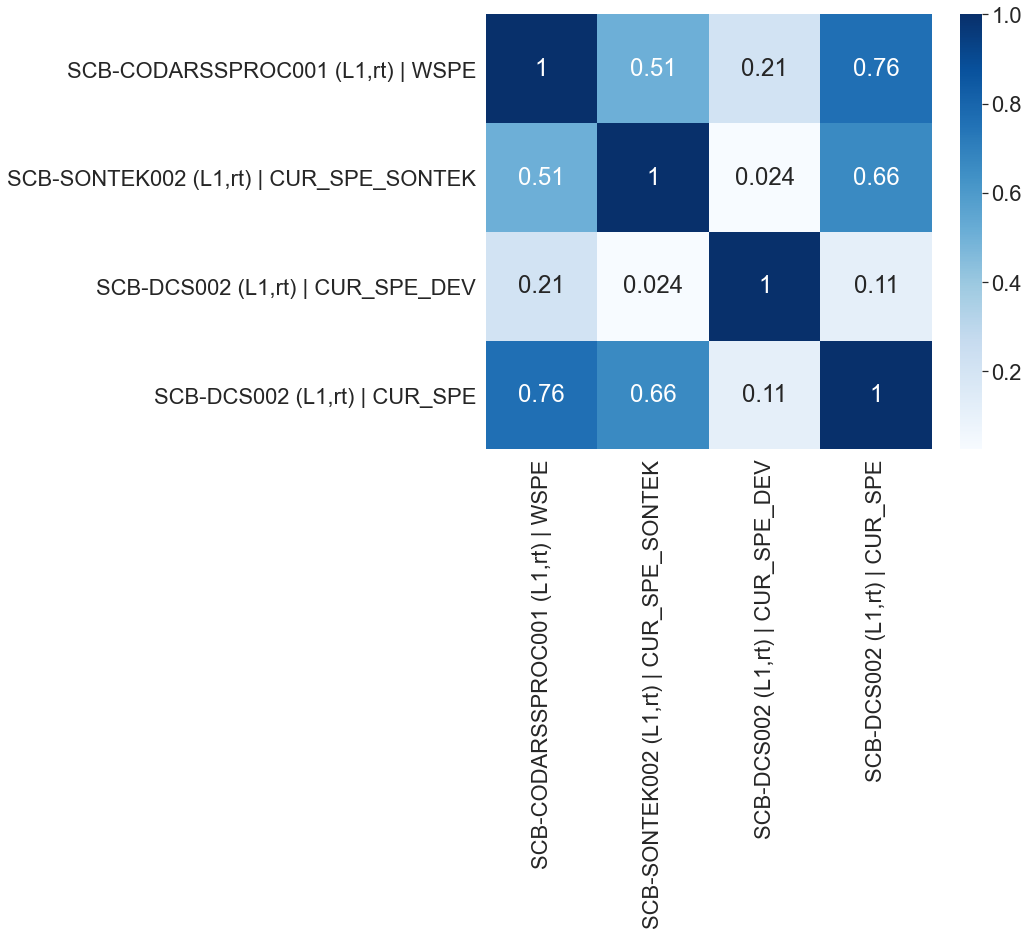

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
ax = seaborn.heatmap(df_series_corr, cmap="Blues", annot=True);

### MEAN SQUARE ERROR

In [13]:
df_series_mse = mse(df_series)
df_series_mse

,"SCB-CODARSSPROC001 (L1,rt) | WSPE","SCB-SONTEK002 (L1,rt) | CUR_SPE_SONTEK","SCB-DCS002 (L1,rt) | CUR_SPE_DEV","SCB-DCS002 (L1,rt) | CUR_SPE"
"SCB-CODARSSPROC001 (L1,rt) | WSPE",0.000000,0.004373,0.004954,0.002563
"SCB-SONTEK002 (L1,rt) | CUR_SPE_SONTEK",0.004373,0.000000,0.004999,0.002828
"SCB-DCS002 (L1,rt) | CUR_SPE_DEV",0.004954,0.004999,0.000000,0.005738
"SCB-DCS002 (L1,rt) | CUR_SPE",0.002563,0.002828,0.005738,0.000000


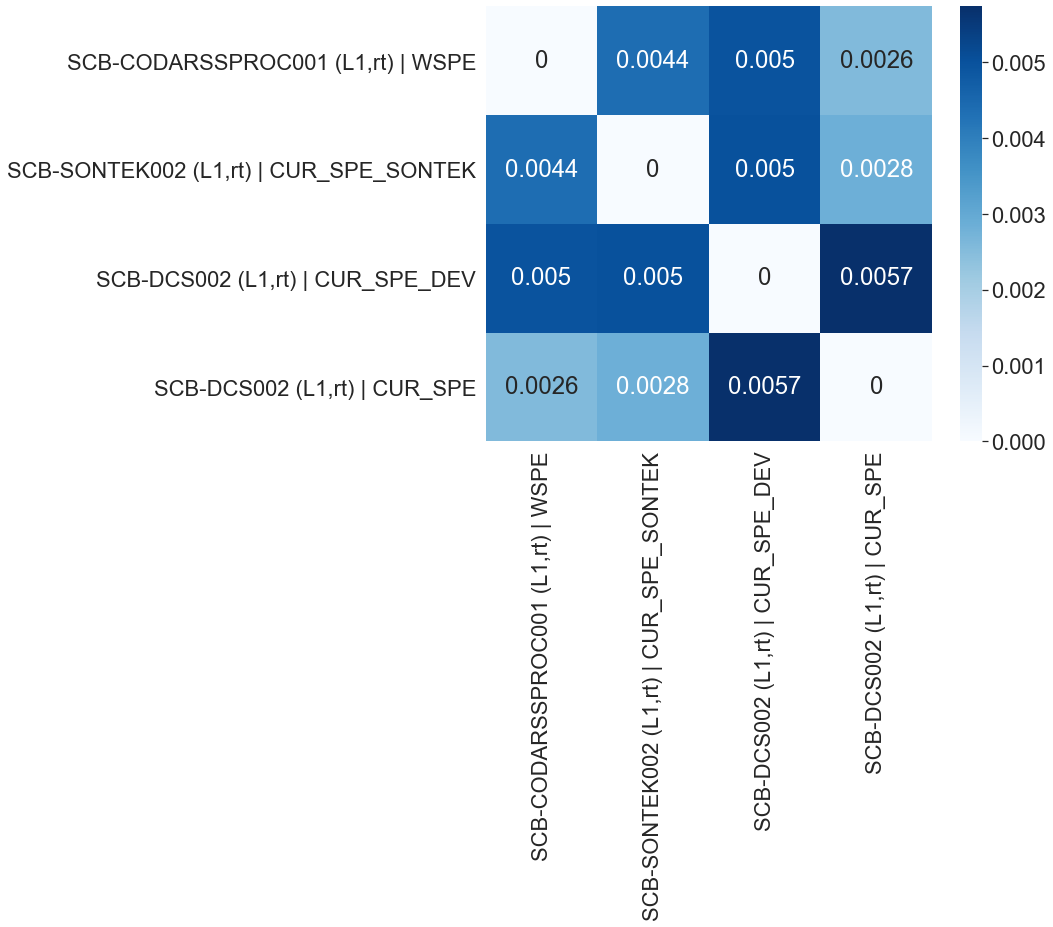

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
ax = seaborn.heatmap(df_series_mse, cmap="Blues", annot=True);

## REGRESSION PLOTS

In [15]:
pivot = 'SCB-CODARSSPROC001 (L1,rt) | WSPE'

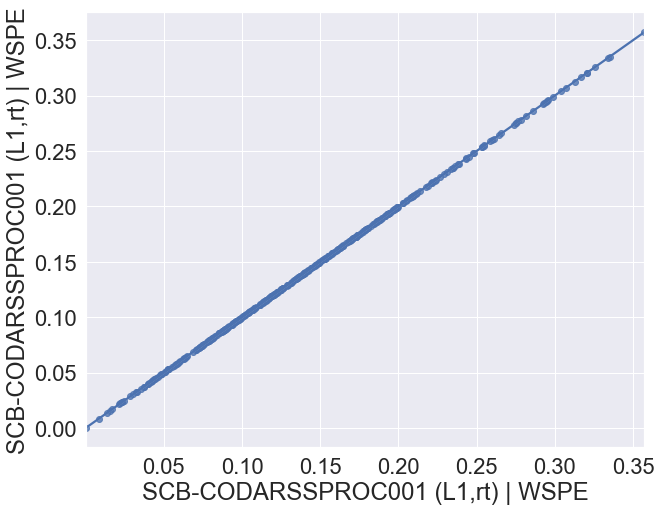

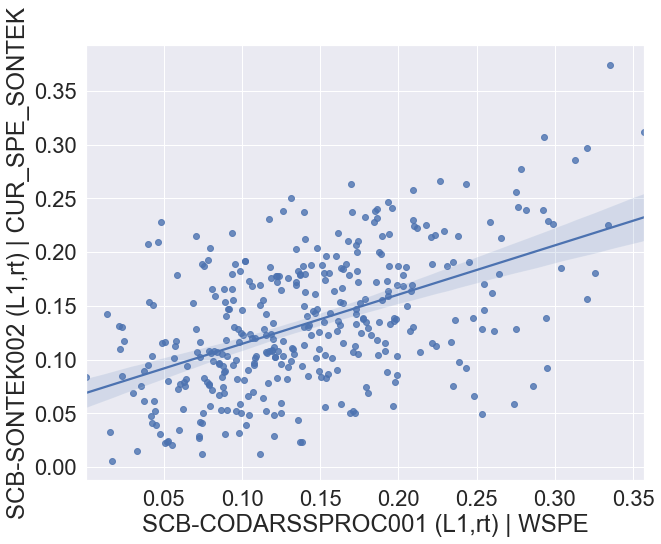

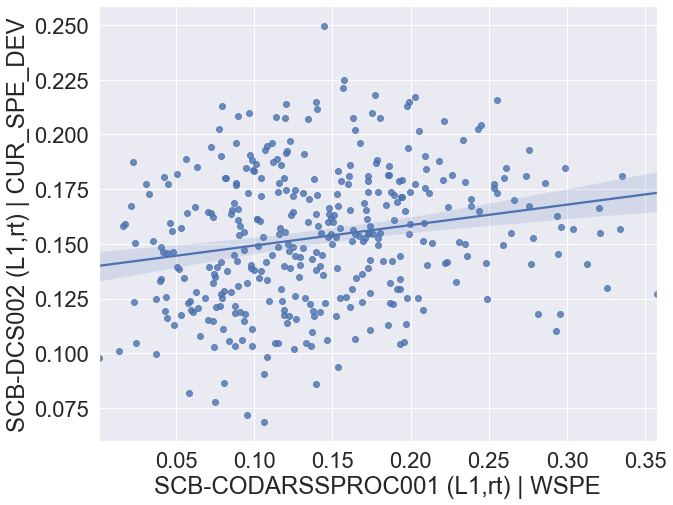

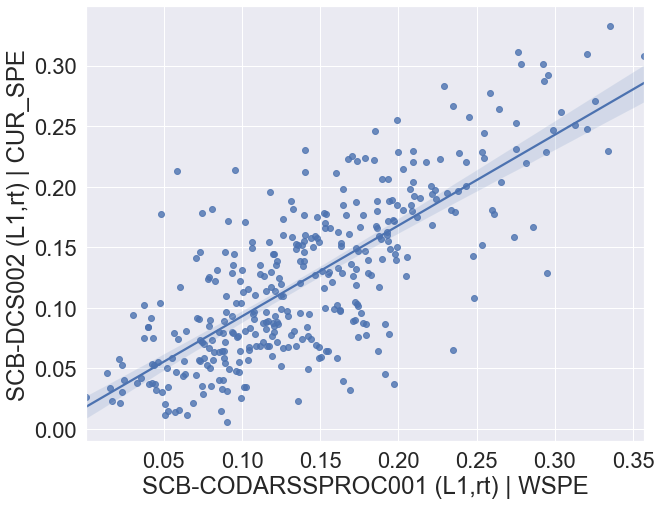

In [16]:
cols = list(df_series.columns)
for j in cols:
    fig, ax = plt.subplots(figsize=(10,8))
    seaborn.regplot(x=pivot, y=j,data=df_series, ax = ax)

## SUMMARY

In [17]:
name = '%s_%s-%s.xlsx'%(standard_name, period[0].replace('-',''),period[1].replace('-',''))
name

'sea_water_speed_20170701-20170730.xlsx'

In [18]:
writer = pd.ExcelWriter(name, engine='xlsxwriter')
df_series.to_excel(writer, sheet_name='series')
df_series_desc.to_excel(writer, sheet_name='description')
df_series_qc.to_excel(writer, sheet_name='qualityflags')
df_series_corr.to_excel(writer, sheet_name='correlation')
df_series_mse.to_excel(writer, sheet_name='meansquareerror')
writer.save()